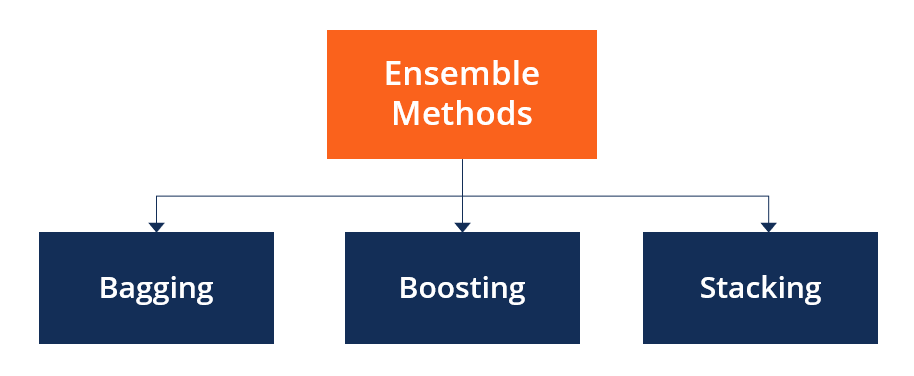

<div class = "alert alert-info">
<h1>Introduction</h1>
<br>

Suppose you pose a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer. This is called the wisdom of the crowd.

Similarly, if you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of pre‐
dictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.


</div>

<div class = "alert alert-warning">
    <h1>Voting Classifiers</h1>

<ui><li>Suppose you have trained a few classifiers, each one achieving about 80% accuracy.
You may have a Logistic Regression classifier, an SVM classifier, a Random Forest
    classifier, a K-Nearest Neighbors classifier, and perhaps a few more</li></ui>
</div>

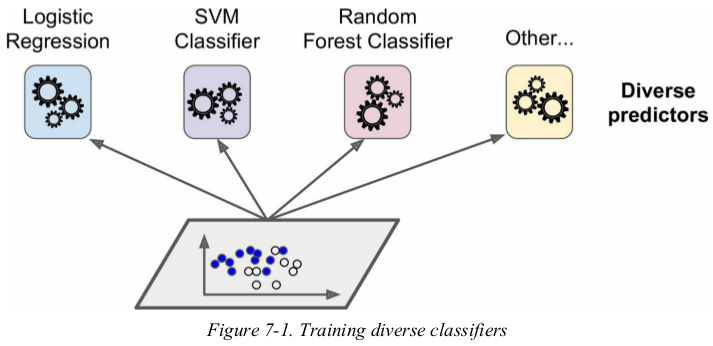

<div class = "alert alert-danger">
    
<ui><li>A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This majority-vote classi‐
fier is called a hard voting classifier</li></ui>
</div>

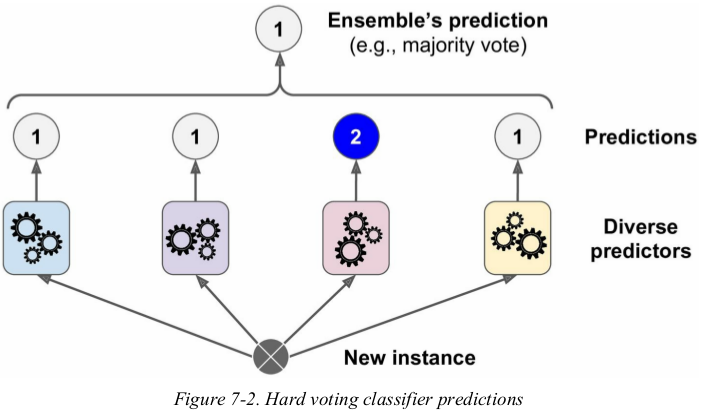

<div class = "alert alert-warning">
Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the
best classifier in the ensemble. In fact, even if each classifier is a weak learner (mean‐
ing it does only slightly better than random guessing), the ensemble can still be a
strong learner (achieving high accuracy), provided there are a sufficient number of
weak learners and they are sufficiently diverse
    
</div>

<div class = "alert alert-info">

<ui><li>Ensemble methods work best when the predictors are as independ‐
ent from one another as possible. One way to get diverse classifiers
is to train them using very different algorithms. This increases the
chance that they will make very different types of errors, improving
                the ensemble’s accuracy.</li></ui>


<ui><li>The following code creates and trains a voting classifier in Scikit-Learn, composed of
three diverse classifiers the training set is the moons dataset,</li></ui>
    
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


<div class = "alert alert-success">


<ui><li>There you have it! The voting classifier slightly outperforms all the individual
             classifiers.</li></ui>


<br>
<ui><li>If all classifiers are able to estimate class probabilities (i.e., they all have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called soft
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
    voting="soft" and ensure that all classifiers can estimate class probabilities</li></ui>
    
</div>

In [7]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


<div class = "alert alert-danger">

<h1>Bagging and Pasting</h1>

<ui><li>One way to get a diverse set of classifiers is to use very different training algorithms,
as just discussed. Another approach is to use the same training algorithm for every
predictor and train them on different random subsets of the training set. When sam‐
pling is performed with replacement, this method is called bagging1
(short for bootstrap aggregating). When sampling is performed without replacement, it is called
    pasting.</li></ui>


<ui><li>In other words, both bagging and pasting allow training instances to be sampled sev‐
eral times across multiple predictors, but only bagging allows training instances to be
sampled several times for the same predictor. This sampling and training process is
represented in</li></ui>
    
</div>

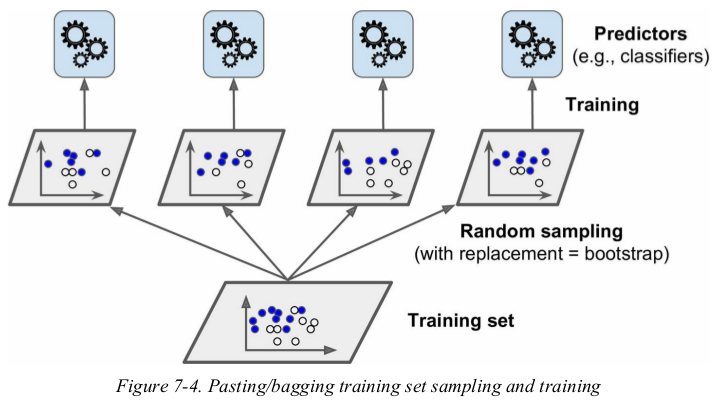

<div class = "alert alert-warning">
Once all predictors are trained, the ensemble can make a prediction for a new
instance by simply aggregating the predictions of all predictors. The aggregation
function is typically the statistical mode (i.e., the most frequent prediction, just like a
hard voting classifier) for classification, or the average for regression. Each individual
predictor has a higher bias than if it were trained on the original training set, but
aggregation reduces both bias and variance. Generally, the net result is that the
ensemble has a similar bias but a lower variance than a single predictor trained on the
original training set.
</div>

<div class = "alert alert-info">
Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
sifier class (or BaggingRegressor for regression). The following code trains an
ensemble of 500 Decision Tree classifiers:5
 each is trained on 100 training instances
randomly sampled from the training set with replacement (this is an example of bag‐
ging, but if you want to use pasting instead, just set bootstrap=False). The n_jobs
parameter tells Scikit-Learn the number of CPU cores to use for training and predic‐
tions (–1 tells Scikit-Learn to use all available cores):
    
</div>

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=42)

In [12]:
y_pred = bag_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [14]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


<div class = "alert alert-success">
The BaggingClassifier automatically performs soft voting
instead of hard voting if the base classifier can estimate class proba‐
bilities (i.e., if it has a predict_proba() method), which is the case
with Decision Tree classifiers
    
</div >

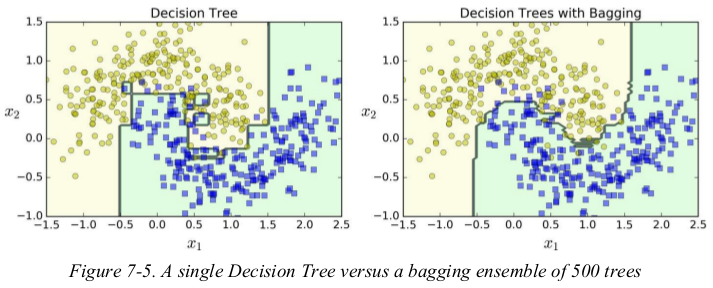


<div class = "alert alert-info">
<h1>Out-of-Bag Evaluation</h1>

<ui><li>With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
    for all predictors.</li></ui>

<ui><li>Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.
In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training. The following code demonstrates
this. The resulting evaluation score is available through the oob_score_ variable:</li></ui>

</div>


In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

<div class = "alert alert-success">
    
According to this oob evaluation, this BaggingClassifier is likely to achieve about
90.1% accuracy on the test set. Let’s verify this:
</div>

In [17]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

<div class = "alert alert-success">
We get 91.2% accuracy on the test set—close enough!
    
<br>

The oob decision function for each training instance is also available through the
oob_decision_function_ variable.
    
</div>

In [18]:
# bag_clf.oob_decision_function_

<div class = "alert alert-danger">

<h1>Random Patches and Random Subspaces</h1>


<ui><li>The BaggingClassifier class supports sampling the features as well. Sampling is
controlled by two hyperparameters: max_features and bootstrap_features. They
work the same way as max_samples and bootstrap, but for feature sampling instead
of instance sampling. Thus, each predictor will be trained on a random subset of the
    input features.</li></ui>

<ui><li>This technique is particularly useful when you are dealing with high-dimensional
inputs (such as images). Sampling both training instances and features is called the
Random Patches method.</li></ui>

<ui><li>Keeping all training instances (by setting bootstrap=False and max_samples=1.0) but sampling features (by setting bootstrap_features to
True and/or max_features to a value smaller than 1.0) is called the Random Subspa‐
ces method.Sampling features results in even more predictor diversity, trading a bit more bias for
a lower variance.</li></ui>

</div>

<div class = "alert alert-warning">
<h1>Random Forests</h1>

As we have discussed, a Random Forest9
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and pass‐
ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks). The following code uses all
available CPU cores to train a Random Forest classifier with 500 trees
</div>

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

<div class = "alert alert-success">
With a few exceptions, a RandomForestClassifier has all the hyperparameters of a
DecisionTreeClassifier (to control how trees are grown), plus all the hyperpara‐
meters of a BaggingClassifier to control the ensemble itself.11
The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node , it
searches for the best feature among a random subset of features. The algorithm
results in greater tree diversity, which (again) trades a higher bias for a lower var‐
iance, generally yielding an overall better model. The following BaggingClassifier
is roughly equivalent to the previous RandomForestClassifier:
</div>

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [21]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [22]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

1.0

<div class = "alert alert-info">
<h1>Extra-Trees</h1>

When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting (as discussed earlier). It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is called an Extremely Randomized Trees
ensemble12 (or Extra-Trees for short). Once again, this technique trades more bias for
a lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests, because finding the best possible threshold for each feature at every node is
one of the most time-consuming tasks of growing a tree.
You can create an Extra-Trees classifier using Scikit-Learn’s ExtraTreesClassifier
class. Its API is identical to the RandomForestClassifier class. Similarly, the Extra
TreesRegressor class has the same API as the RandomForestRegressor class.
    
</div>


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [27]:

y_pred_etc = etc.predict(X_test)

In [28]:
np.sum(y_pred == y_pred_etc) / len(y_pred)  # very similar predictions

0.928

<div class = "alert alert-success">
It is hard to tell in advance whether a RandomForestClassifier
will perform better or worse than an ExtraTreesClassifier. Gen‐
erally, the only way to know is to try both and compare them using
cross-validation (tuning the hyperparameters using grid search).
    
</div>

<div class = "alert alert-danger">

<h1>Feature Importance</h1>

<ui><li>Another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it</li></ui>

<ui><li>Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the feature_importances_ variable. For example, the following code
    trains a RandomForestClassifier on the iris dataset</li></ui>

</div>

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [30]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

<div class = "alert alert-success">
Similarly, if you train a Random Forest classifier on the MNIST dataset and plot each pixel’s importance, you get the image represented

</div>

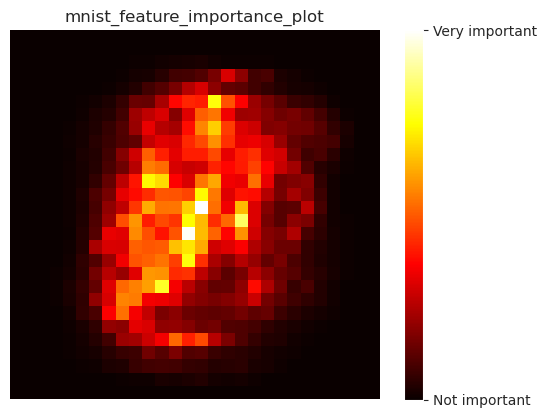

In [33]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
    
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.title("mnist_feature_importance_plot")
plt.show()

<div class = "alert alert-warning">
<h1>Boosting</h1>

Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its prede‐
cessor.

There are many boosting methods available, but by far the most popular are
AdaBoost (short for Adaptive Boosting) and Gradient Boosting. Let’s start with Ada‐
Boost.
</div>

<div class = "alert alert-info">
<h1>AdaBoost</h1>

One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predic‐
tors focusing more and more on the hard cases. This is the technique used by
AdaBoost.
    
    
    
For example, when training an AdaBoost classifier, the algorithm first trains a base
classifier (such as a Decision Tree) and uses it to make predictions on the training set.
The algorithm then increases the relative weight of misclassified training instances.
Then it trains a second classifier, using the updated weights, and again makes predic‐
tions on the training set, updates the instance weights, and so on
    
    
</div>

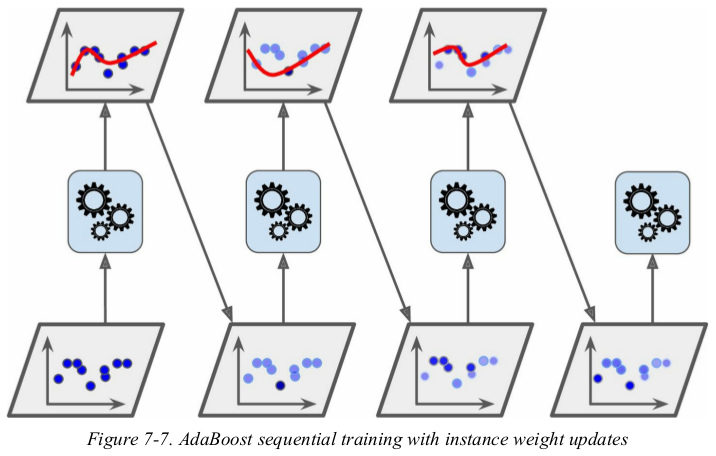

<div class = "alert alert-success">
Let’s take a closer look at the AdaBoost algorithm. Each instance weight w(i)
 is initially
set to 1/m. A first predictor is trained, and its weighted error rate r1
is computed on
the training set; see

</div>


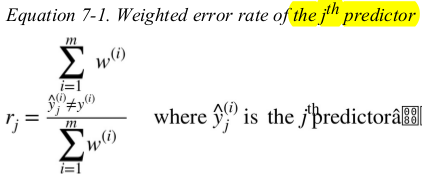

<div class = "alert alert-success">
The predictor’s weight αj
 is then computed using
    
</div>

 
 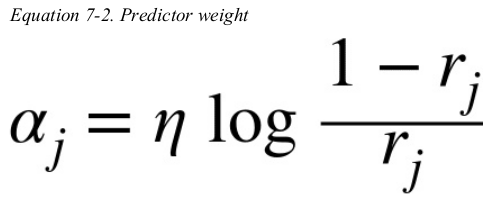
 
 
<div class = "alert alert-warning">
 where η is the learning rate hyperparameter (defaults to 1). The more accurate the predictor is，the higher its weight will be. If it is just guessing randomly，then its weight will be close to zero. However，if it is most often wrong (i.e., less accurate than random guessing), then its weight will be negative.
    
   </div>


<div class = "alert alert-success">
Next, the AdaBoost algorithm updates the instance weights, using 
which boosts the weights of the misclassified instances.

</div>

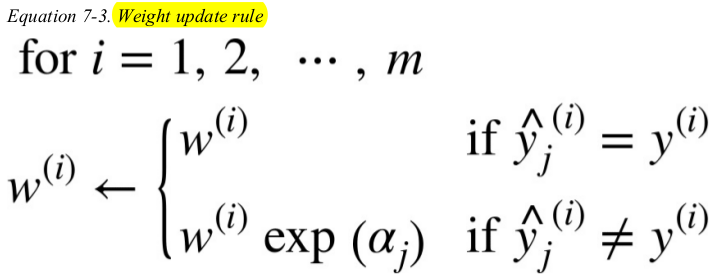


#### Then all the instance weights are normalized i.e., divided by 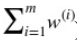


<div class = "alert alert-danger">
Finally, a new predictor is trained using the updated weights, and the whole process is
repeated (the new predictor’s weight is computed, the instance weights are updated,
then another predictor is trained, and so on). The algorithm stops when the desired
number of predictors is reached, or when a perfect predictor is found.
    
    
<br>
To make predictions, AdaBoost simply computes the predictions of all the predictors
and weighs them using the predictor weights αj
. The predicted class is the one that
receives the majority of weighted votes
</div>

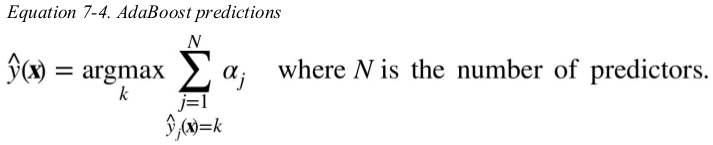

In [34]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [38]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.896

<div class = "alert alert-success">

If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regulariz‐
ing the base estimator.

</div>


<div class = "alert alert-info">
<h1>Gradient Boosting</h1>



<ui><li>Another very popular boosting algorithm is Gradient Boosting. Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
    errors made by the previous predictor.</li></ui>
<ui><li>Let’s go through a simple regression example, using Decision Trees as the base predic‐
tors (of course, Gradient Boosting also works great with regression tasks). This is
called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). First, let’s
fit a DecisionTreeRegressor to the training set (for example, a noisy quadratic train‐
ing set):</li></ui>

</div>

In [40]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [42]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [44]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [45]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

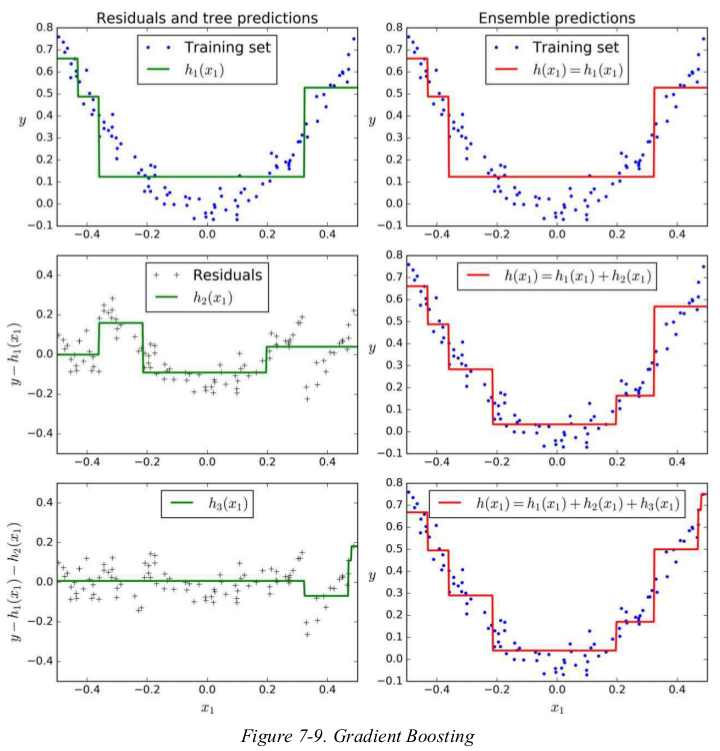

<div class = "alert alert-success">
A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRe
gressor class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf), as well as
hyperparameters to control the ensemble training, such as the number of trees
(n_estimators). The following code creates the same ensemble as the previous one:
    
</div>

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [47]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

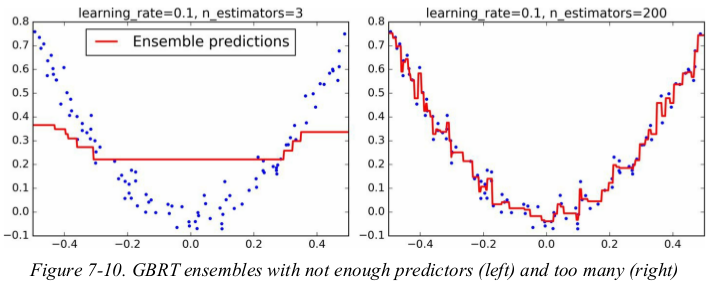

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

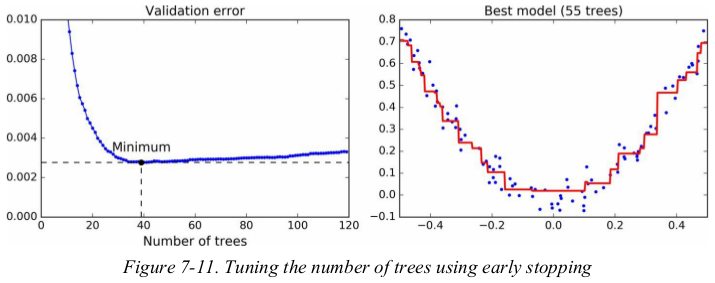

<div class = "alert alert-warning">

<h1>XGBoost</h1>

It is worth noting that an optimized implementation of Gradient Boosting is available
in the popular Python library , which stands for Extreme Gradient Boosting.
This package was initially developed by Tianqi Chen as part of the Distributed (Deep)
Machine Learning Community (DMLC), and it aims to be extremely fast, scalable,
and portable. In fact, XGBoost is often an important component of the winning
entries in ML competitions. XGBoost’s API is quite similar to Scikit-Learn’s:
</div>

In [51]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [52]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) 
    print("Validation MSE:", val_error)           

Validation MSE: 0.004000408205406276


In [53]:
if xgboost is not None:  
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  
    print("Validation MSE:", val_error)            

[0]	validation_0-rmse:0.22834
[1]	validation_0-rmse:0.16224
[2]	validation_0-rmse:0.11843
[3]	validation_0-rmse:0.08760
[4]	validation_0-rmse:0.06848
[5]	validation_0-rmse:0.05709
[6]	validation_0-rmse:0.05297
[7]	validation_0-rmse:0.05129
[8]	validation_0-rmse:0.05155
[9]	validation_0-rmse:0.05211
Validation MSE: 0.002630868681577655


In [54]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

48.5 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

52.2 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div class = "alert alert-danger">
<h1>Stacking</h1>

The last Ensemble method we will discuss in this chapter is called stacking (short for
stacked generalization).It is based on a simple idea: instead of using trivial functions
(such as hard voting) to aggregate the predictions of all predictors in an ensemble




This shows such an
ensemble performing a regression task on a new instance. Each of the bottom three
predictors predicts a different value (3.1, 2.7, and 2.9), and then the final predictor
(called a blender, or a meta learner) takes these predictions as inputs and makes the
final prediction (3.0)
</div>

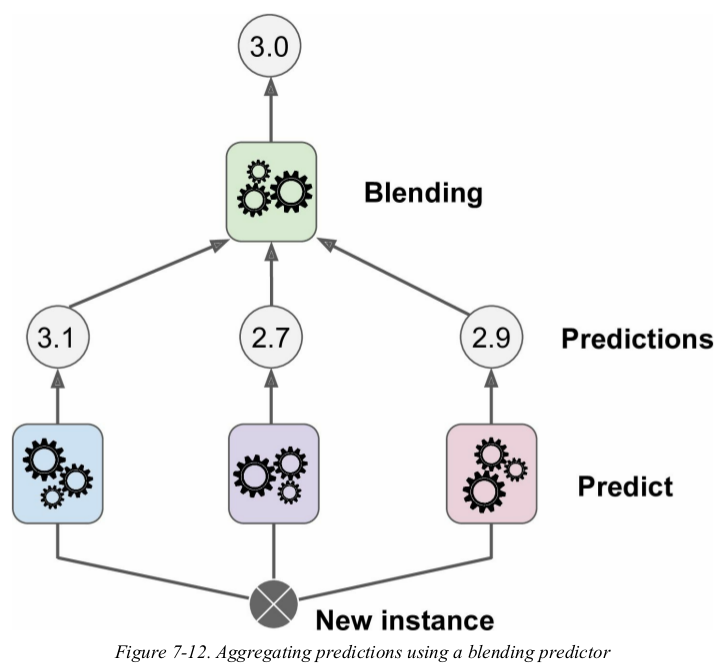

<div class = "alert alert-success">


To train the blender, a common approach is to use a hold-out set.19 Let’s see how it
works. First, the training set is split into two subsets. The first subset is used to train
the predictors in the first layer
</div>

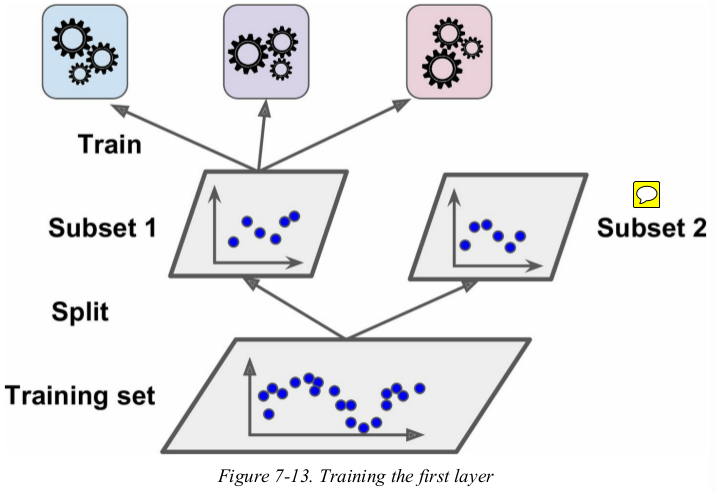


<div class = "alert alert-info">


Next, the first layer’s predictors are used to make predictions on the second (heldout) set (see Figure 7-14). This ensures that the predictions are “clean,” since the pre‐
dictors never saw these instances during training. For each instance in the hold-out
set, there are three predicted values. We can create a new training set using these pre‐
dicted values as input features (which makes this new training set 3D), and keeping
the target values. The blender is trained on this new training set, so it learns to pre‐
dict the target value, given the first layer’s predictions.

</div>
    
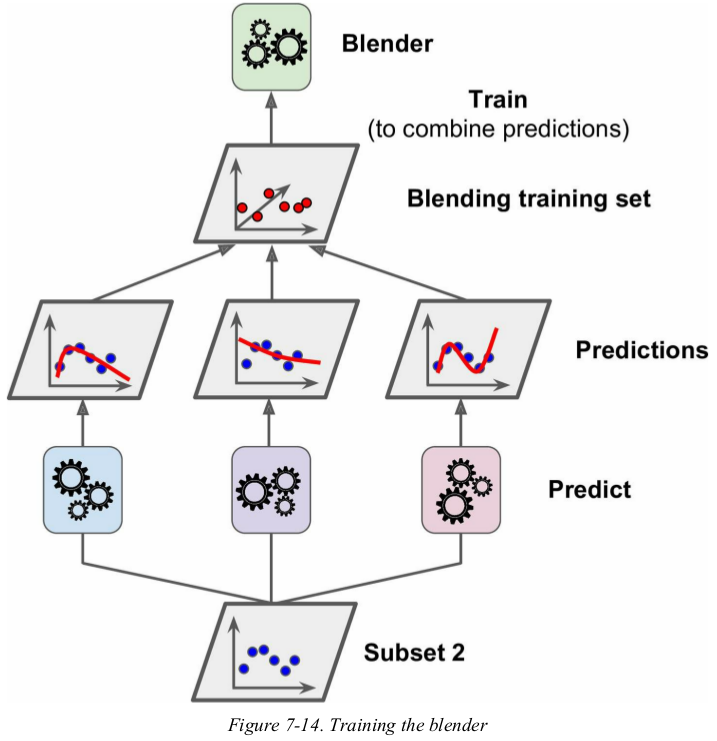


<div class = "alert alert-warning">


It is actually possible to train several different blenders this way (e.g., one using Lin‐
ear Regression, another using Random Forest Regression), to get a whole layer of
blenders. The trick is to split the training set into three subsets: the first one is used to
train the first layer, the second one is used to create the training set used to train the
second layer (using predictions made by the predictors of the first layer), and the
third one is used to create the training set to train the third layer (using predictions
made by the predictors of the second layer). Once this is done, we can make a predic‐
tion for a new instance by going through each layer sequentially, as shown

</div>

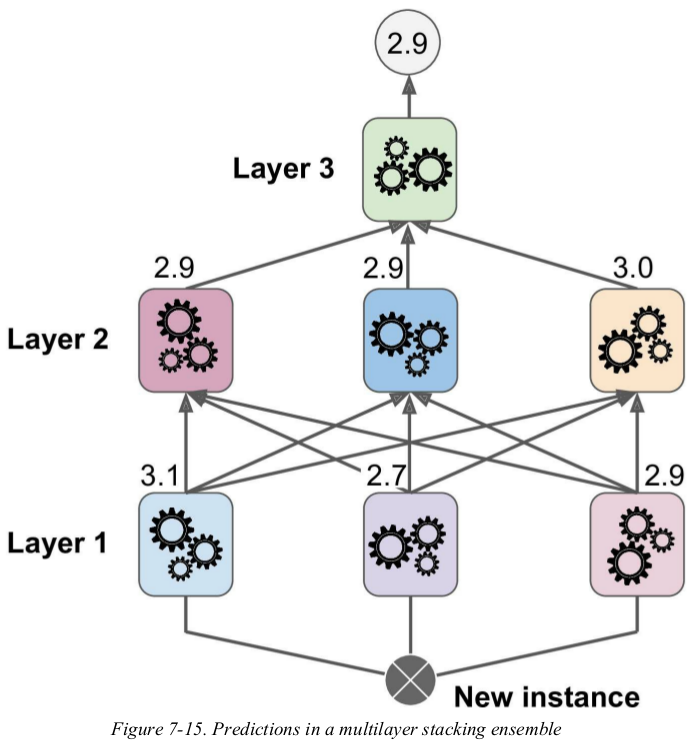



<div class = "alert alert-success">

Unfortunately, Scikit-Learn does not support stacking directly, but it is not too hard
to roll out your own implementation. Alternatively, you
can use an open source implementation such as DESlib.
</div>